# Transformaciones geométricas

pip ó conda install opencv-contrib-python https://pypi.python.org/pypi/opencv-contrib-python

OpenCV 3.x with Python By Example - Second Edition - (Cap. 1) Applying Geometric Transformations to Images
https://learning.oreilly.com/library/view/opencv-3x-with/9781788396905/05910c5b-9e47-460c-ad90-1f176de02f93.xhtml

Practical Computer Vision - (Cap. 1) Getting Started
https://learning.oreilly.com/library/view/practical-computer-vision/9781788297684/aa647006-d87d-4ba5-8fee-ccfb49615ad6.xhtml

Computer Vision with Python 3 - (Cap 1) Introduction to Image Processing
https://learning.oreilly.com/library/view/computer-vision-with/9781788299763/5f33ee33-b2e4-4f2c-b875-59d8e8daef18.xhtml

In [1]:
import numpy as np  
import cv2 

import matplotlib.pyplot as plt
import plot_cv_utils # Comentar en script

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5)

## Lectura y escritura de imágenes

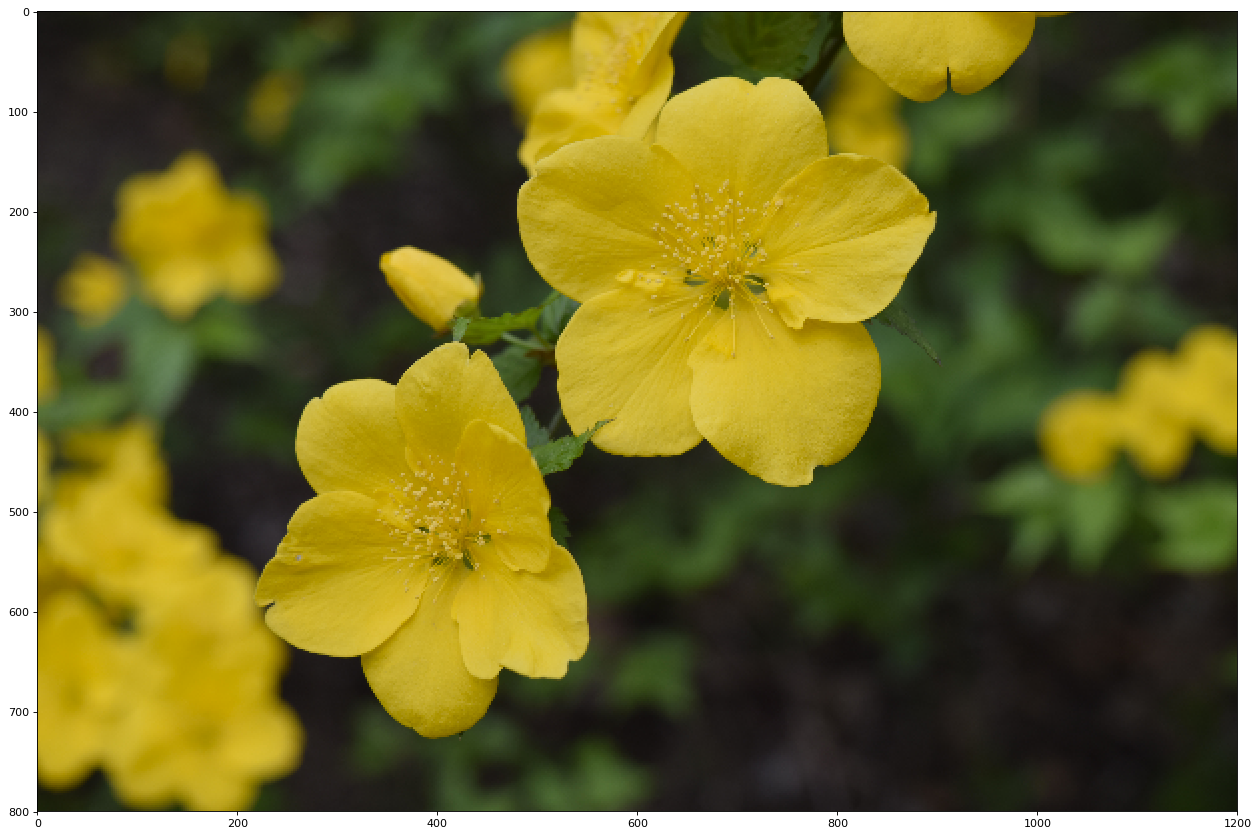

In [2]:
# loads and read an image from path to file
img =  cv2.imread('figures/flower.png')

# mostrar la imagen usando openCV
# keeps the window open untill a key is pressed
# cv2.imshow('image',img)
# cv2.waitKey(0)
#clears all window buffers
# cv2.destroyAllWindows()

# mostrar la imagen usando matplotlib 
plot_cv_utils.plot_cv_img_org(img)

# para guardar la imagen
# cv2.imwrite('figures/output.jpg', gray_img)


## Espacios de color

### A gris

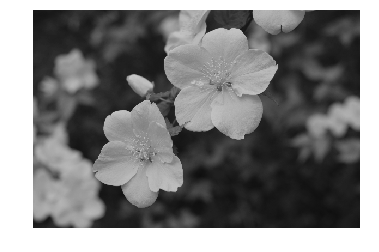

In [3]:
# convert the color to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_cv_utils.plot_cv_img(gray, True)

### A YUV (Luma, Crominancia)

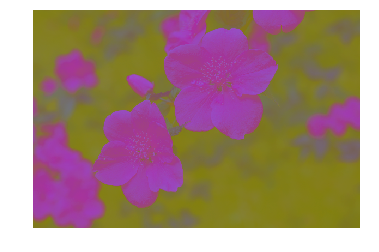

In [4]:
# convert the color to yuv 
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plot_cv_utils.plot_cv_img(yuv)

### A HSL (Matiz, Saturación, Luminosidad)

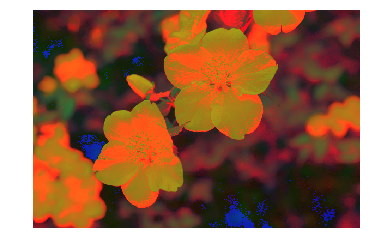

In [5]:
# convert the color to hls 
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plot_cv_utils.plot_cv_img(hls)

### A HSV (Matiz, Saturación, Valor)

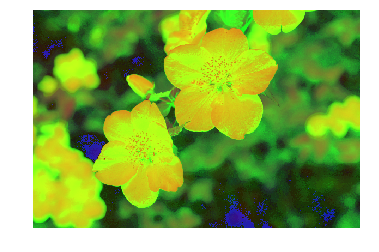

In [6]:
# convert the color to hsv 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plot_cv_utils.plot_cv_img(hsv)

### A LAB (Luminosidad, Rojo a verde, Gradiente azul)

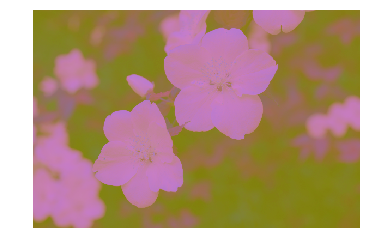

In [7]:
# convert the color to lab 
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
plot_cv_utils.plot_cv_img(lab)

## Geometría básica

### Recorte (Crop)

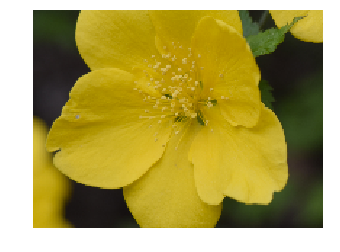

In [8]:
plot_cv_utils.plot_cv_img(img[400:700, 200:600])

### Escalado

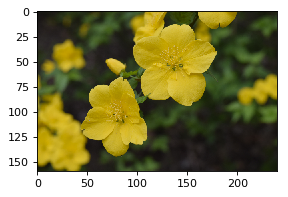

In [9]:
img_scaled = cv2.resize(img,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
plot_cv_utils.plot_cv_img_org(img_scaled)

### Rotación y traslación

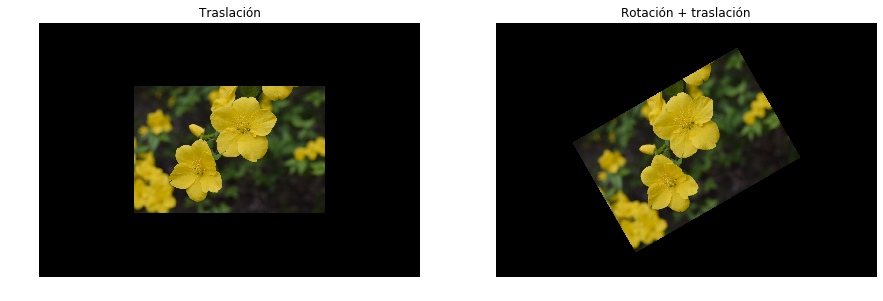

In [10]:
altura, anchura = img.shape[:2]
# Trasladar al centro de la imagen para rotar desde ahí
translation_matrix = np.float32([ [1,0,int(0.5*anchura)],
                                 [0,1,int(0.5*altura)] ])
rotation_matrix = cv2.getRotationMatrix2D((anchura, altura), 30, 1)

# Si se mostrara a tamaño original tendría el doble de tamaño que la imagen original
# se hace así para que no quede la imagen original fuera de los márgenes
img_translation = cv2.warpAffine(img, translation_matrix,
                                 (2*anchura, 2*altura))
img_rotation = cv2.warpAffine(img_translation, rotation_matrix,
                              (anchura*2, altura*2))

plot_cv_utils.subplot_cv_list([img_translation, img_rotation], 
                ['Traslación', 'Rotación + traslación'], False, False)

#### Método para rotar una imagen desde su centro y calcular las nuevas dimensiones del rectángulo de encaje
https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/

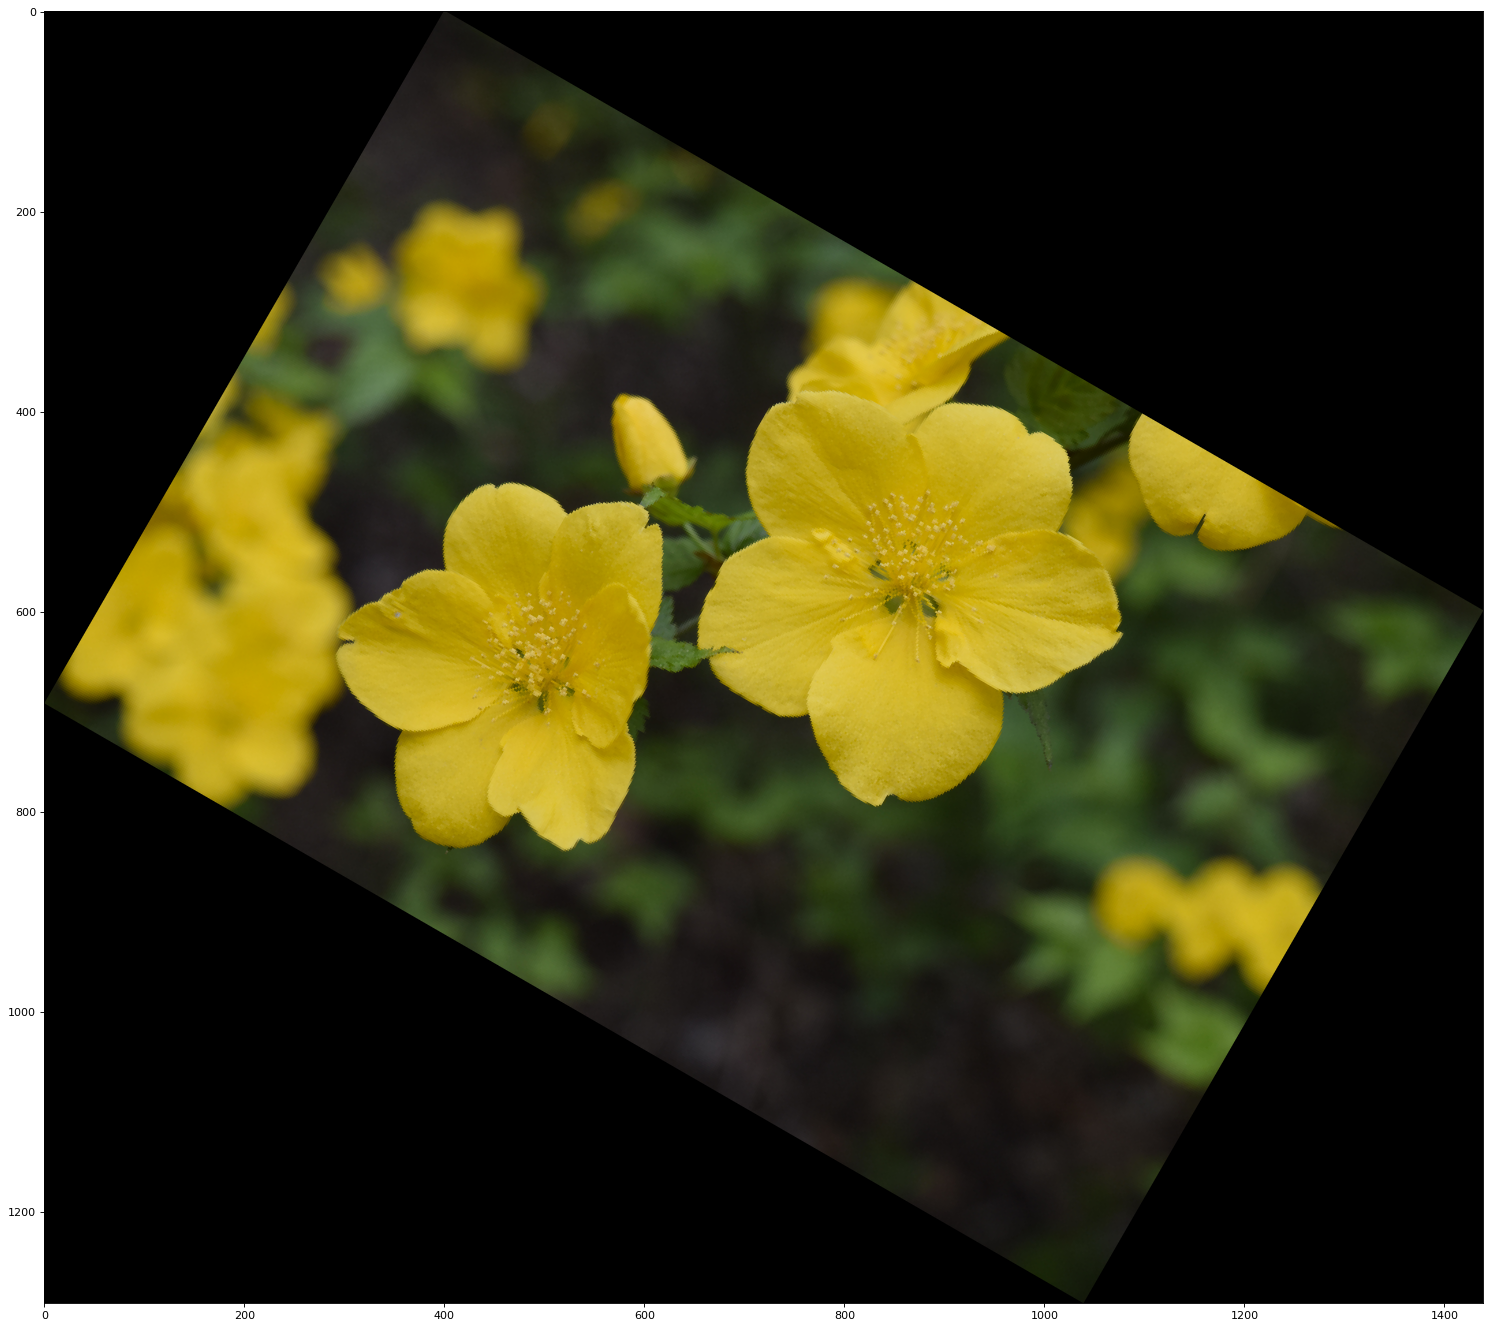

In [11]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))


img_rotation = rotate_bound(img, 30)

plot_cv_utils.plot_cv_img_org(img_rotation)

### Más en los enlaces de la primera celda.